In [1]:
import numpy as np #linear Algebra
import pandas as pd #data manipulation
import seaborn as sns #multiple plots
import matplotlib.pyplot as plt #plotting
import warnings
import os 
warnings.filterwarnings('ignore')
%matplotlib inline  
TITANIC_PATH = os.path.join("datasets", "titanic")
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)


train_df=load_titanic_data("train.csv")
test_df=load_titanic_data("test.csv")

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


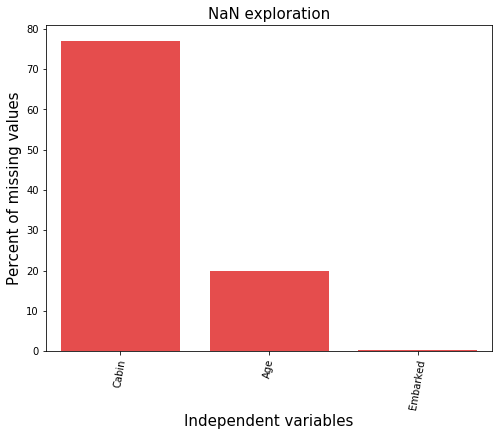

In [4]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='80')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Independent variables', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('NaN exploration', fontsize=15)
    return ms

missingdata(train_df)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


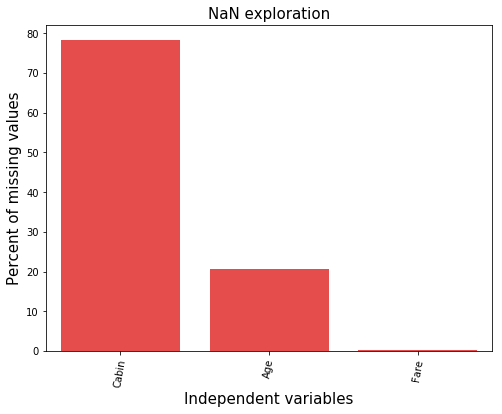

In [5]:
missingdata(test_df)

Text(0.5, 1.0, 'Variable exporation')

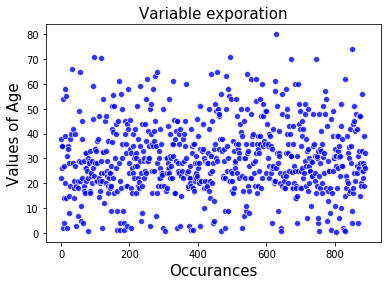

In [6]:
fig=sns.scatterplot(train_df.index, train_df["Age"],color="blue",alpha=0.8)
plt.xlabel('Occurances', fontsize=15)
plt.ylabel('Values of Age', fontsize=15)
plt.title('Variable exporation', fontsize=15)

In [7]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)


#For example when trying to exclude the cabin column we are going to receive unnecessary warnings. Exclude! (thats why we imported it)
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [8]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [9]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
all_data=[train_df,test_df]

In [11]:
import re
# A way to think about textual preprocessing is: Given my character column, what are some regularities that occur often. In our case we see titles (miss,mr etc).
# Let us then extract second word from every row and assign it to a new column. Not only that let us make it categorical (so that we can one-hot encode it) where we observe the most frequent ones.


def title_parser(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # Check whether title exists, then return it, if not ""
    if title_search:
        return title_search.group(1)
    return ""
# New column named Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(title_parser)
# Irrelevant titles should be just called irrelevant (in sence that they do not occur often)
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'irrelevant')
# Let us make sure they are categorical, where we replace similiar names
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

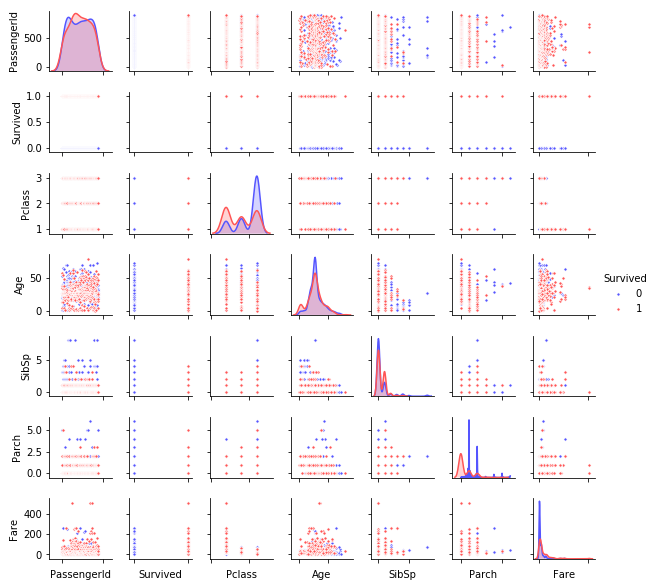

In [12]:
g = sns.pairplot(data=train_df, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [13]:
all_data=[train_df,test_df]

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    ## create bin for age features
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    


In [14]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [15]:
traindf=train_df
testdf=test_df

all_dat=[traindf,testdf]

for dataset in all_dat:
    drop_column = ['Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2,Adult,Low_fare
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2,Adult,high_fare
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1,Adult,median_fare
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2,Adult,high_fare
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1,Adult,median_fare


In [17]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

traindf.head()
testdf.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,34.5,0,0,7.8292,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,2,1,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,62.0,0,0,9.6875,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,896,3,22.0,1,1,12.2875,3,1,0,0,...,0,1,0,0,0,1,0,1,0,0


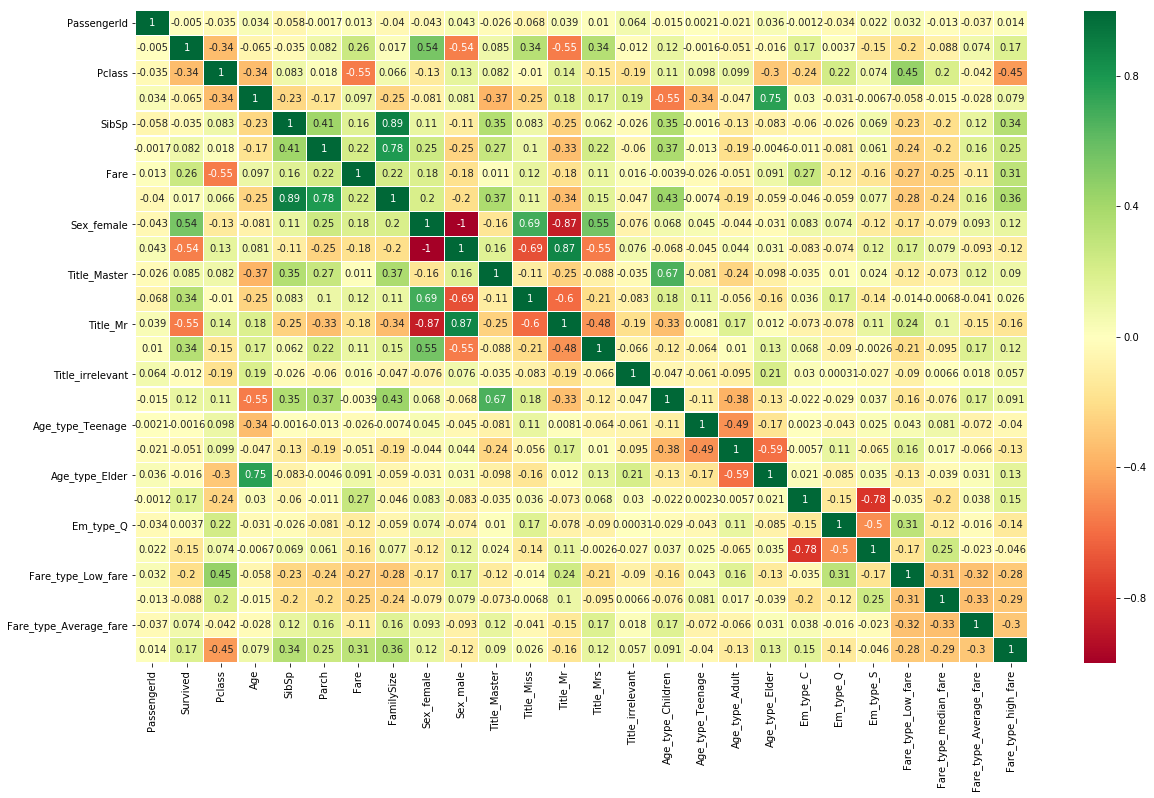

In [18]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [19]:
type(traindf["Age"])

pandas.core.series.Series

In [20]:
from sklearn.preprocessing import MinMaxScaler


traindf[['Age','Fare']] = traindf[['Age',"Fare"]].apply(pd.to_numeric)
scaler = MinMaxScaler()
traindf[['Age','Fare']] = scaler.fit_transform(traindf[['Age',"Fare"]])

drop_column = ['PassengerId']#id of any kind will be always dropped since it does not have predictive power
traindf.drop(drop_column, axis=1, inplace = True)
train_X = traindf.drop("Survived", axis=1)#we do not need train test splitting with skicit learn (in nomral setting test_df and train_df will be concatanted and then use it)
train_Y=traindf["Survived"]
test_X  = testdf.drop("PassengerId", axis=1).copy() 
train_X.shape, train_Y.shape, test_X.shape


traindf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,0.271174,1,0,0.014151,2,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,0.472229,1,0,0.139136,2,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,0.321438,0,0,0.015469,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,1,1,0.434531,1,0,0.103644,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,3,0.434531,0,0,0.015713,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [21]:
from sklearn.model_selection import train_test_split #split the dat in test and train sets
from sklearn.model_selection import cross_val_score #score evaluation with cross validation
from sklearn.model_selection import cross_val_predict #prediction with cross validation
from sklearn.metrics import confusion_matrix #for confusion matrix (metric of succes)
from sklearn.model_selection import KFold #for K-fold cross validation
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts


all_features = traindf.drop("Survived",axis=1) #all of the independent variables are necessary for the cross_val function
Targeted_feature = traindf["Survived"]

X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)

In [22]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X  = testdf.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape


import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(train_X,train_Y)


# Best Estimator
modelf.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   48.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:  3.1min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [23]:
modelf.best_score_

0.8372615039281706

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estim=range(100, 1000, 100)

param_grid = {"n_estimators" :n_estim}

model_rf = GridSearchCV(model, param_grid = param_grid, cv=5, scoring="accuracy", n_jobs=4, verbose = 1)
model_rf.fit(train_X, train_Y)

model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   21.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
model_rf.best_score_

0.8047138047138047

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
param_grid = {'tol':[0.001, 0.01, .1, .2]}
                      
modell = GridSearchCV(model, param_grid = param_grid, cv=5, scoring="accuracy", n_jobs=4, verbose = 1)
modell.fit(train_X, train_Y)

modell.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.6s finished


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.001)

In [27]:
modell.best_score_

0.8249158249158249

Accuracy 83.21
The cross validated score 81.82


Text(0.5, 1.05, 'Confusion matrix')

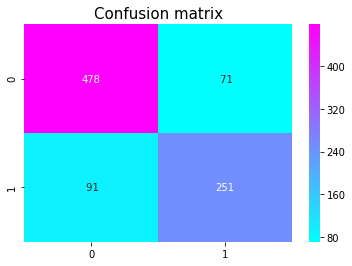

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
prediction_lr=model.predict(X_test)

print('Accuracy', round(accuracy_score(prediction_lr, y_test)*100,2))
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score', round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05,size=15)

Accuracy 83.58
The cross validated score 83.16


Text(0.5, 1.05, 'Confusion matrix')

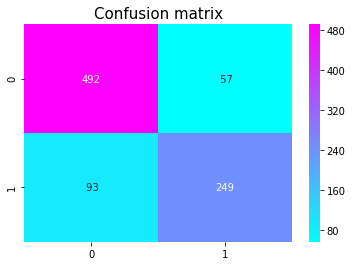

In [29]:
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)

print('Accuracy', round(accuracy_score(prediction_svm, y_test)*100,2))
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score', round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05,size=15)

Accuracy 80.97
The cross validated score 82.27


Text(0.5, 1.05, 'Confusion matrix')

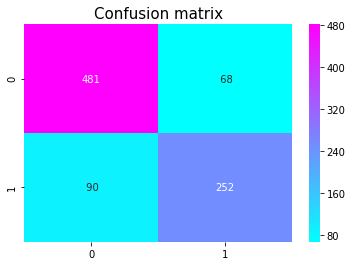

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)

print('Accuracy', round(accuracy_score(prediction_knn, y_test)*100,2))
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score', round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05,size=15)

Accuracy 76.87
The cross validated score 79.02


Text(0.5, 1.05, 'Confusion matrix')

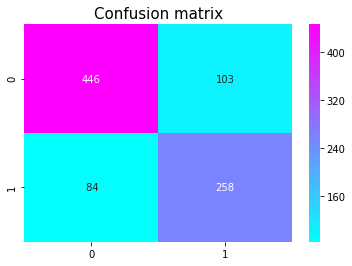

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)

print('Accuracy', round(accuracy_score(prediction_gnb, y_test)*100,2))
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score', round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05,size=15)

Accuracy 79.48
The cross validated score 78.57


Text(0.5, 1.05, 'Confusion matrix')

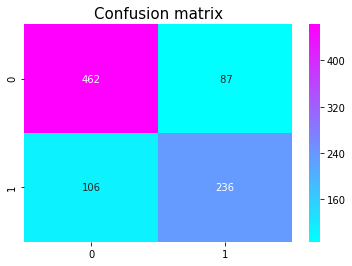

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',
                              min_samples_split=10,min_samples_leaf=1,
                              max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)

print('Accuracy', round(accuracy_score(prediction_tree, y_test)*100,2))
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score', round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05,size=15)

Accuracy 80.97
The cross validated score 81.49


Text(0.5, 1.05, 'Confusion matrix')

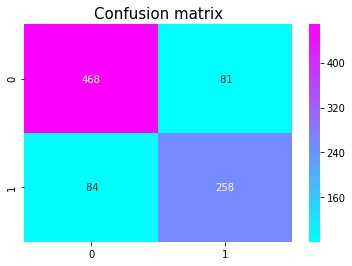

In [33]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)

print('Accuracy', round(accuracy_score(prediction_adb, y_test)*100,2))
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score', round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05,size=15)

Accuracy 82.84
The cross validated score 82.72


Text(0.5, 1.05, 'Confusion matrix')

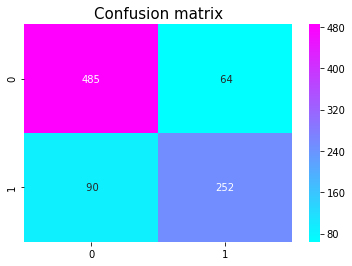

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)

print('Accuracy', round(accuracy_score(prediction_lda, y_test)*100,2))
result_lda=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score', round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05,size=15)

Accuracy 82.09
The cross validated score 84.29


Text(0.5, 1.05, 'Confusion matrix')

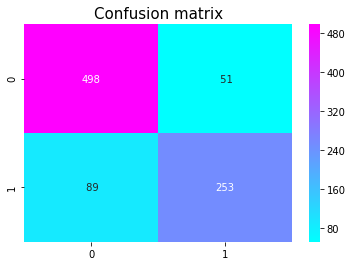

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)

print('Accuracy', round(accuracy_score(prediction_gbc, y_test)*100,2))
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score', round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05,size=15)

Accuracy 82.09
The cross validated score 84.29


Text(0.5, 1.05, 'Confusion matrix')

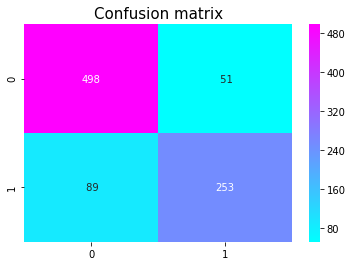

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(criterion='gini', n_estimators=700,
                                 min_samples_split=10,min_samples_leaf=1,
                                 max_features='auto',oob_score=True,
                                 random_state=1,n_jobs=-1)
model_rf.fit(X_train,y_train)
prediction_rm=model.predict(X_test)

print('Accuracy', round(accuracy_score(prediction_rm, y_test)*100,2))
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score', round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05,size=15)

Accuracy 79.85
The cross validated score 80.48


Text(0.5, 1.05, 'Confusion matrix')

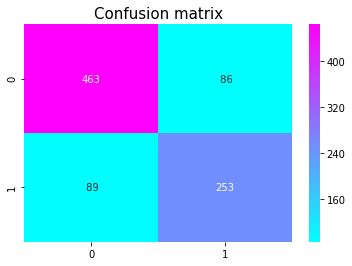

In [37]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model1.fit(X_train,y_train)

prediction_rm1=model1.predict(X_test)

print('Accuracy',round(accuracy_score(prediction_rm1,y_test)*100,2))
result_rm1=cross_val_score(model1,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_rm1.mean()*100,2))
y_pred = cross_val_predict(model1,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

In [38]:
models = pd.DataFrame({
    'Model': ["support vector machine",'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis', 
              'Decision Tree',"Tuned RF"],
    'Score': [result_svm.mean(),result_knn.mean(), result_lr.mean(), 
              result_rm.mean(), result_gnb.mean(), result_adb.mean(), 
              result_gbc.mean(), result_lda.mean(), result_tree.mean(),result_rm1.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,0.842892
6,Gradient Decent,0.842892
0,support vector machine,0.831644
7,Linear Discriminant Analysis,0.827175
1,KNN,0.822667
2,Logistic Regression,0.818249
5,AdaBoostClassifier,0.814877
9,Tuned RF,0.804778
4,Naive Bayes,0.790157
8,Decision Tree,0.785713


In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
                                      oob_score=False, random_state=None, verbose=0,
                                      warm_start=False)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X, train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)
print(acc_random_forest)

98.2


Feature selection


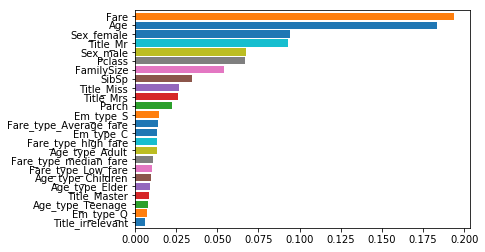

In [41]:
print("Feature selection")
pd.Series(random_forest.feature_importances_, X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)

In [42]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_pred_rf
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [43]:
submission.to_csv('submission.csv', index=False)